In [4]:
import findspark
findspark.init()

from pyspark import SparkContext
from pyspark.sql import SparkSession 

sc = SparkContext()
spark = SparkSession.builder.appName("HW4-1").getOrCreate()

Py4JJavaError: An error occurred while calling None.org.apache.spark.api.java.JavaSparkContext.
: java.net.ConnectException: Call From ip-172-31-15-218/172.31.15.218 to ip-172-31-15-218.ec2.internal:8032 failed on connection exception: java.net.ConnectException: Connection refused; For more details see:  http://wiki.apache.org/hadoop/ConnectionRefused
	at sun.reflect.GeneratedConstructorAccessor5.newInstance(Unknown Source)
	at sun.reflect.DelegatingConstructorAccessorImpl.newInstance(DelegatingConstructorAccessorImpl.java:45)
	at java.lang.reflect.Constructor.newInstance(Constructor.java:423)
	at org.apache.hadoop.net.NetUtils.wrapWithMessage(NetUtils.java:801)
	at org.apache.hadoop.net.NetUtils.wrapException(NetUtils.java:732)
	at org.apache.hadoop.ipc.Client.getRpcResponse(Client.java:1493)
	at org.apache.hadoop.ipc.Client.call(Client.java:1435)
	at org.apache.hadoop.ipc.Client.call(Client.java:1345)
	at org.apache.hadoop.ipc.ProtobufRpcEngine$Invoker.invoke(ProtobufRpcEngine.java:227)
	at org.apache.hadoop.ipc.ProtobufRpcEngine$Invoker.invoke(ProtobufRpcEngine.java:116)
	at com.sun.proxy.$Proxy15.getNewApplication(Unknown Source)
	at org.apache.hadoop.yarn.api.impl.pb.client.ApplicationClientProtocolPBClientImpl.getNewApplication(ApplicationClientProtocolPBClientImpl.java:258)
	at sun.reflect.GeneratedMethodAccessor3.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at org.apache.hadoop.io.retry.RetryInvocationHandler.invokeMethod(RetryInvocationHandler.java:409)
	at org.apache.hadoop.io.retry.RetryInvocationHandler$Call.invokeMethod(RetryInvocationHandler.java:163)
	at org.apache.hadoop.io.retry.RetryInvocationHandler$Call.invoke(RetryInvocationHandler.java:155)
	at org.apache.hadoop.io.retry.RetryInvocationHandler$Call.invokeOnce(RetryInvocationHandler.java:95)
	at org.apache.hadoop.io.retry.RetryInvocationHandler.invoke(RetryInvocationHandler.java:346)
	at com.sun.proxy.$Proxy16.getNewApplication(Unknown Source)
	at org.apache.hadoop.yarn.client.api.impl.YarnClientImpl.getNewApplication(YarnClientImpl.java:224)
	at org.apache.hadoop.yarn.client.api.impl.YarnClientImpl.createApplication(YarnClientImpl.java:232)
	at org.apache.spark.deploy.yarn.Client.submitApplication(Client.scala:167)
	at org.apache.spark.scheduler.cluster.YarnClientSchedulerBackend.start(YarnClientSchedulerBackend.scala:57)
	at org.apache.spark.scheduler.TaskSchedulerImpl.start(TaskSchedulerImpl.scala:183)
	at org.apache.spark.SparkContext.<init>(SparkContext.scala:501)
	at org.apache.spark.api.java.JavaSparkContext.<init>(JavaSparkContext.scala:58)
	at sun.reflect.NativeConstructorAccessorImpl.newInstance0(Native Method)
	at sun.reflect.NativeConstructorAccessorImpl.newInstance(NativeConstructorAccessorImpl.java:62)
	at sun.reflect.DelegatingConstructorAccessorImpl.newInstance(DelegatingConstructorAccessorImpl.java:45)
	at java.lang.reflect.Constructor.newInstance(Constructor.java:423)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:247)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:238)
	at py4j.commands.ConstructorCommand.invokeConstructor(ConstructorCommand.java:80)
	at py4j.commands.ConstructorCommand.execute(ConstructorCommand.java:69)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Thread.java:748)
Caused by: java.net.ConnectException: Connection refused
	at sun.nio.ch.SocketChannelImpl.checkConnect(Native Method)
	at sun.nio.ch.SocketChannelImpl.finishConnect(SocketChannelImpl.java:714)
	at org.apache.hadoop.net.SocketIOWithTimeout.connect(SocketIOWithTimeout.java:206)
	at org.apache.hadoop.net.NetUtils.connect(NetUtils.java:531)
	at org.apache.hadoop.ipc.Client$Connection.setupConnection(Client.java:685)
	at org.apache.hadoop.ipc.Client$Connection.setupIOstreams(Client.java:788)
	at org.apache.hadoop.ipc.Client$Connection.access$3500(Client.java:410)
	at org.apache.hadoop.ipc.Client.getConnection(Client.java:1550)
	at org.apache.hadoop.ipc.Client.call(Client.java:1381)
	... 32 more


In [ ]:
spotify = spark.read.format("csv").option("header", "true").load("s3://502-mountain-dew-spotify/training_set/")
spotify.printSchema()

In [ ]:
feature = spark.read.format("csv").option("header", "true").load("s3://502-mountain-dew-spotify/track_features/")
feature.schema

In [ ]:
tf_schema = feature.schema.names
tf_schema = list(set(tf_schema) - set(['track_id','mode']))

In [ ]:
for x in tf_schema:
    feature =feature.withColumn(x, feature[x].cast(DoubleType()))

In [24]:
feature.printSchema()

root
 |-- track_id: string (nullable = true)
 |-- duration: double (nullable = true)
 |-- release_year: double (nullable = true)
 |-- us_popularity_estimate: double (nullable = true)
 |-- acousticness: double (nullable = true)
 |-- beat_strength: double (nullable = true)
 |-- bounciness: double (nullable = true)
 |-- danceability: double (nullable = true)
 |-- dyn_range_mean: double (nullable = true)
 |-- energy: double (nullable = true)
 |-- flatness: double (nullable = true)
 |-- instrumentalness: double (nullable = true)
 |-- key: double (nullable = true)
 |-- liveness: double (nullable = true)
 |-- loudness: double (nullable = true)
 |-- mechanism: double (nullable = true)
 |-- mode: string (nullable = true)
 |-- organism: double (nullable = true)
 |-- speechiness: double (nullable = true)
 |-- tempo: double (nullable = true)
 |-- time_signature: double (nullable = true)
 |-- valence: double (nullable = true)
 |-- acoustic_vector_0: double (nullable = true)
 |-- acoustic_vector_1: 

## Merge data

In [25]:
df = spotify.join(feature, spotify.track_id_clean == feature.track_id , "inner")
df.printSchema()

root
 |-- session_id: string (nullable = true)
 |-- session_position: string (nullable = true)
 |-- session_length: string (nullable = true)
 |-- track_id_clean: string (nullable = true)
 |-- skip_1: string (nullable = true)
 |-- skip_2: string (nullable = true)
 |-- skip_3: string (nullable = true)
 |-- not_skipped: string (nullable = true)
 |-- context_switch: string (nullable = true)
 |-- no_pause_before_play: string (nullable = true)
 |-- short_pause_before_play: string (nullable = true)
 |-- long_pause_before_play: string (nullable = true)
 |-- hist_user_behavior_n_seekfwd: string (nullable = true)
 |-- hist_user_behavior_n_seekback: string (nullable = true)
 |-- hist_user_behavior_is_shuffle: string (nullable = true)
 |-- hour_of_day: string (nullable = true)
 |-- date: string (nullable = true)
 |-- premium: string (nullable = true)
 |-- context_type: string (nullable = true)
 |-- hist_user_behavior_reason_start: string (nullable = true)
 |-- hist_user_behavior_reason_end: string

In [26]:
columns_to_drop = ["hist_user_behavior_reason_start", "hist_user_behavior_reason_end", "context_type", "date"
                  ,"hour_of_day", "hist_user_behavior_is_shuffle", "hist_user_behavior_n_seekfwd", "session_length","session_position"]
df_drop = df.drop(*columns_to_drop)

In [27]:
from pyspark.sql.types import *

for c in ["skip_1", "skip_2", "skip_3", "not_skipped", "context_switch", "no_pause_before_play",
         "short_pause_before_play", "long_pause_before_play", "premium"]:
    df_drop = df_drop.withColumn(c, df_drop[c].cast(BooleanType()))
for c in ["hist_user_behavior_n_seekback"]:
    df_drop = df_drop.withColumn(c, df_drop[c].cast(IntegerType()))  
    
df_drop.printSchema()

root
 |-- session_id: string (nullable = true)
 |-- track_id_clean: string (nullable = true)
 |-- skip_1: boolean (nullable = true)
 |-- skip_2: boolean (nullable = true)
 |-- skip_3: boolean (nullable = true)
 |-- not_skipped: boolean (nullable = true)
 |-- context_switch: boolean (nullable = true)
 |-- no_pause_before_play: boolean (nullable = true)
 |-- short_pause_before_play: boolean (nullable = true)
 |-- long_pause_before_play: boolean (nullable = true)
 |-- hist_user_behavior_n_seekback: integer (nullable = true)
 |-- premium: boolean (nullable = true)
 |-- track_id: string (nullable = true)
 |-- duration: double (nullable = true)
 |-- release_year: double (nullable = true)
 |-- us_popularity_estimate: double (nullable = true)
 |-- acousticness: double (nullable = true)
 |-- beat_strength: double (nullable = true)
 |-- bounciness: double (nullable = true)
 |-- danceability: double (nullable = true)
 |-- dyn_range_mean: double (nullable = true)
 |-- energy: double (nullable = tr

In [67]:
from pyspark.sql.functions import col, countDistinct

def pause_udf(short_pause, long_pause):
    if short_pause or long_pause:
        return 0
    else:
        return 1
    
pause = spark.udf.register("pause", pause_udf)

df1 = df_drop.select("session_id", "track_id_clean", "skip_1", "skip_2", "skip_3",
                     "not_skipped", "context_switch", "hist_user_behavior_n_seekback",
                     "premium", pause(col("short_pause_before_play"), col("long_pause_before_play")).alias("Not_Pause"))

#df_drop1 = df_drop.join(df1, ["session_id"] , "left")
df1 = df1.withColumn("Not_Pause", df1["Not_Pause"].cast(IntegerType()))

In [60]:
df1.printSchema()

root
 |-- session_id: string (nullable = true)
 |-- track_id_clean: string (nullable = true)
 |-- skip_1: boolean (nullable = true)
 |-- skip_2: boolean (nullable = true)
 |-- skip_3: boolean (nullable = true)
 |-- not_skipped: boolean (nullable = true)
 |-- context_switch: boolean (nullable = true)
 |-- hist_user_behavior_n_seekback: integer (nullable = true)
 |-- premium: boolean (nullable = true)
 |-- Not_Pause: integer (nullable = true)



## Visualization

In [42]:
ddd = feature.toPandas()

In [40]:
feature.cache()

DataFrame[track_id: string, duration: double, release_year: double, us_popularity_estimate: double, acousticness: double, beat_strength: double, bounciness: double, danceability: double, dyn_range_mean: double, energy: double, flatness: double, instrumentalness: double, key: double, liveness: double, loudness: double, mechanism: double, mode: string, organism: double, speechiness: double, tempo: double, time_signature: double, valence: double, acoustic_vector_0: double, acoustic_vector_1: double, acoustic_vector_2: double, acoustic_vector_3: double, acoustic_vector_4: double, acoustic_vector_5: double, acoustic_vector_6: double, acoustic_vector_7: double]

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline

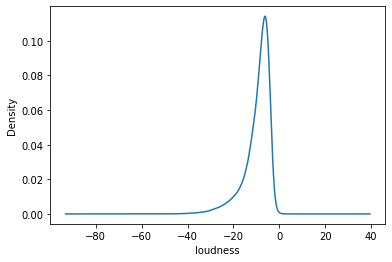

In [54]:
fig = ddd['loudness'].plot(kind='density')
fig.set_label('Density Plot of Loudness')
fig.set_xlabel('loudness')
plt.savefig('Loudness.png')

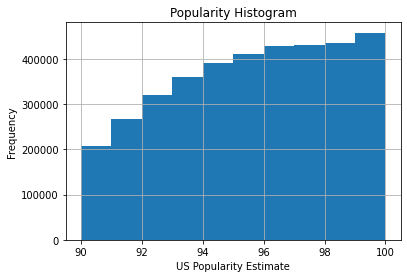

In [53]:
fig2 = ddd['us_popularity_estimate'].hist()
fig2.set_title('Popularity Histogram')
fig2.set_xlabel('US Popularity Estimate')
fig2.set_ylabel('Frequency')
plt.savefig('Popularity.png')

In [97]:
feature.printSchema()

root
 |-- track_id: string (nullable = true)
 |-- duration: double (nullable = true)
 |-- release_year: double (nullable = true)
 |-- us_popularity_estimate: double (nullable = true)
 |-- acousticness: double (nullable = true)
 |-- beat_strength: double (nullable = true)
 |-- bounciness: double (nullable = true)
 |-- danceability: double (nullable = true)
 |-- dyn_range_mean: double (nullable = true)
 |-- energy: double (nullable = true)
 |-- flatness: double (nullable = true)
 |-- instrumentalness: double (nullable = true)
 |-- key: double (nullable = true)
 |-- liveness: double (nullable = true)
 |-- loudness: double (nullable = true)
 |-- mechanism: double (nullable = true)
 |-- mode: string (nullable = true)
 |-- organism: double (nullable = true)
 |-- speechiness: double (nullable = true)
 |-- tempo: double (nullable = true)
 |-- time_signature: double (nullable = true)
 |-- valence: double (nullable = true)
 |-- acoustic_vector_0: double (nullable = true)
 |-- acoustic_vector_1: 

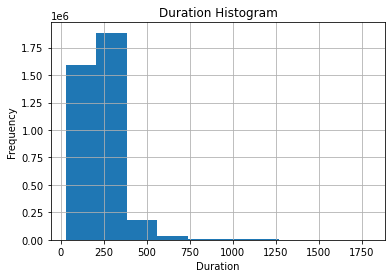

In [99]:
fig3 = ddd['duration'].hist()
fig3.set_title('Duration Histogram')
fig3.set_xlabel('Duration')
fig3.set_ylabel('Frequency')
plt.savefig('Duration.png')

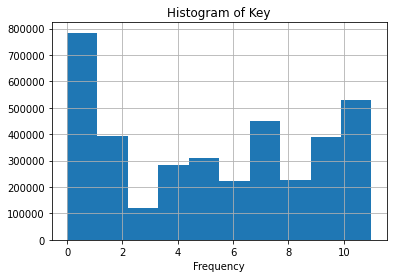

In [105]:
fig4 = ddd['key'].hist()
fig4.set_title('Histogram of Key')
fig4.set_xlabel('Frequency')
plt.savefig('Key.png')

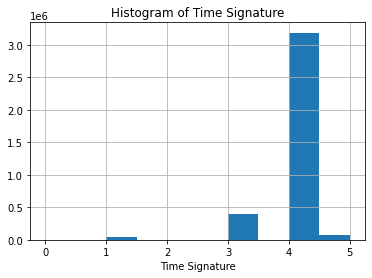

In [106]:
fig5 = ddd['time_signature'].hist()
fig5.set_title('Histogram of Time Signature')
fig5.set_xlabel('Time Signature')
plt.savefig('time signature.png')

In [62]:
df1.createOrReplaceTempView('df')

In [64]:
display(spark.sql("""
    select Not_pause
    from df


"""))

DataFrame[track_id_clean: string, Not_pause: int]

In [112]:
dist_v = df1.agg(*(countDistinct(col(c)).alias(c) for c in ['not_skipped','context_switch','premium','Not_Pause']))

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:39475)
Traceback (most recent call last):
  File "/usr/lib/spark/python/lib/py4j-0.10.7-src.zip/py4j/java_gateway.py", line 929, in _get_connection
    connection = self.deque.pop()
IndexError: pop from an empty deque

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/lib/spark/python/lib/py4j-0.10.7-src.zip/py4j/java_gateway.py", line 1067, in start
    self.socket.connect((self.address, self.port))
ConnectionRefusedError: [Errno 111] Connection refused


Py4JNetworkError: An error occurred while trying to connect to the Java server (127.0.0.1:39475)

In [109]:
dist_v.write.csv("s3://anly502-final-datavis/demo2",mode='overwrite')
#feature.write.csv('s3://anly502-final-datavis/demo1',mode='overwrite')

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:39475)
Traceback (most recent call last):
  File "/usr/lib/spark/python/lib/py4j-0.10.7-src.zip/py4j/java_gateway.py", line 929, in _get_connection
    connection = self.deque.pop()
IndexError: pop from an empty deque

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/lib/spark/python/lib/py4j-0.10.7-src.zip/py4j/java_gateway.py", line 1067, in start
    self.socket.connect((self.address, self.port))
ConnectionRefusedError: [Errno 111] Connection refused


Py4JNetworkError: An error occurred while trying to connect to the Java server (127.0.0.1:39475)

In [ ]:
df.na.drop().count()

In [2]:
sc.stop()

NameError: name 'sc' is not defined

In [3]:
spark.stop()

NameError: name 'spark' is not defined